# Линейная регрессия и KNN

In [2]:
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

## Часть 1. Работа с модельными данными

### 1.1. Генерация данных

In [15]:
def get_grid(n, D, x_min, x_max):
    xn = np.linspace(x_min, x_max, n)
    xn = np.meshgrid(*([xn]*D))
    return np.concatenate([xi.reshape((n**D, 1)) for xi in xn], axis=1)

def gen_data(n, D, x_min, x_max, f_target, f_noise):
    X = get_grid(n, D, x_min, x_max)
    N = X.shape[0]
    y_gt = f_target(X)
    y = y_gt + f_noise(N)
    return X, y, y_gt

In [16]:
def f_target(X):
    return 2*X + 3

def f_noise(N):
    return np.random.normal(loc=2, scale=2, size=N).reshape((N, 1))

X, y, y_gt = gen_data(10, 1, 0, 10, f_target, f_noise)

### 1.2. Эксперименты

#### Эксперимент 1

Генерация зашумлённой выборки для функции $y = x + \epsilon$, где $x$ принимает значения из равномерной сетки на [0, 3], а $\epsilon \sim \mathcal{N}(0, 1)$\
Пострение графика зависимости ошибки линейной регрессии от размера выборки

In [17]:
def f_target(X):
    return X

def f_noise(N):
    return np.random.normal(loc=0, scale=1, size=N).reshape((N, 1))

N_grid = list(range(10, 1000, 10)) # список N, для которых требуется провести эксперимент

X, y, y_gt = gen_data(N_grid[-1], 1, 0, 3, f_target, f_noise) # Сгенерированные данные

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
err = []
LRs = []
for N in N_grid:
    LR = LinearRegression()
    a = np.random.randint(0, X.shape[0], size = N)
    b = LR.fit(X[a], y[a])
    y_pred = LR.predict(X)
    err.append(mean_squared_error(y_gt, y_pred))
    LRs.append(b)

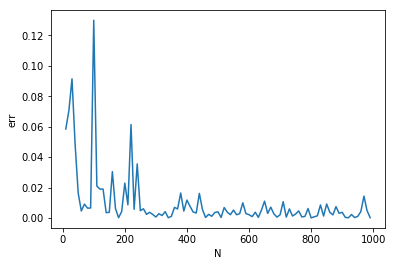

In [19]:
plt.plot(range(10, 1000, 10), err)
plt.xlabel("N")
plt.ylabel("err")
plt.show()

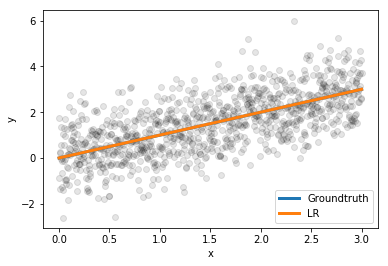

In [20]:
plt.scatter(X, y, c="black", alpha=0.1)
plt.plot(X, y_gt, linewidth=3 )
y_pred = LRs[np.argmin(err)].predict(X)
plt.plot(X, y_pred, linewidth=3)
plt.legend(["Groundtruth", "LR"], loc=4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsRegressor
err = []
KNNs = []
for N in N_grid:
    clf = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
    a = np.random.randint(0, X.shape[0], size = N)
    b = clf.fit(X[a], y[a])
    y_pred = clf.predict(X)
    err.append(mean_squared_error(y_gt, y_pred))
    KNNs.append(b)

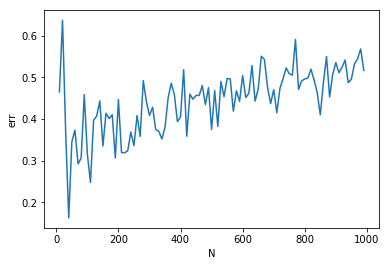

In [22]:
plt.plot(range(10, 1000, 10), err)
plt.xlabel("N")
plt.ylabel("err")
plt.show()

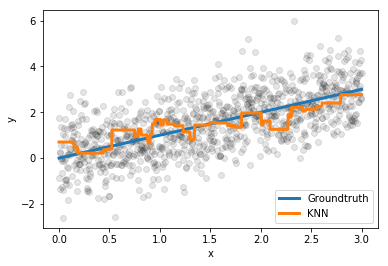

In [23]:
plt.scatter(X, y, c="black", alpha=0.1)
plt.plot(X, y_gt, linewidth=3)
y_pred = KNNs[np.argmin(err)].predict(X)
plt.plot(X, y_pred, linewidth=3)
plt.legend(["Groundtruth", "KNN"], loc=4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [24]:
err = []
KNNs = []
for N in N_grid:
    clf = KNeighborsRegressor(n_neighbors=10, metric='euclidean')
    a = np.random.randint(0, X.shape[0], size = N)
    clf.fit(X[a], y[a])
    y_pred = clf.predict(X)
    err.append(mean_squared_error(y_gt, y_pred))
    KNNs.append(clf.fit(X[a], y[a]))

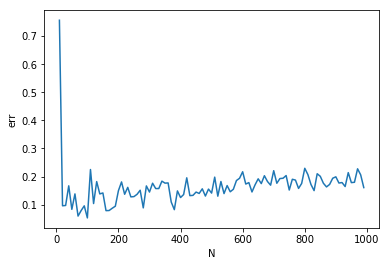

In [25]:
plt.plot(range(10, 1000, 10), err)
plt.xlabel("N")
plt.ylabel("err")
plt.show()

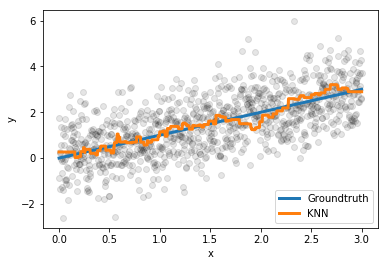

In [26]:
plt.scatter(X, y, c="black", alpha=0.1)
plt.plot(X, y_gt, linewidth=3)
y_pred = KNNs[np.argmin(err)].predict(X)
plt.plot(X, y_pred, linewidth=3)
plt.legend(["Groundtruth", "KNN"], loc=4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Эксперимент 2

Изучение поведение регрессии с полиномиальными признаками\
Генерация выборки для $y = log \frac{1}{3} x + \epsilon$, где $x$ принимает значения из равномерной сетки на  [1, 10], $\epsilon \sim \mathcal{N}(0, 1)$\
Рассмотрим три случая: линейный, полиномиальные признаки степени 2 и 5. Проведем аналогичные тесты.

In [ ]:
import sklearn.preprocessing as pp

def f_target(X):
    return np.log(0.3*X)

def f_noise(N):
    return np.random.normal(loc=0, scale=1, size=N).reshape((N, 1))

N_grid = np.arange(10, 1000, 10)
X, y, y_gt = gen_data(N_grid[-1], 1, 1, 10, f_target, f_noise)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
err_1 = []
LRs_1 = []
for N in N_grid:
    LR = LinearRegression()
    a = np.random.randint(0, X.shape[0], size = N)
    b = LR.fit(X[a], y[a])
    y_pred = LR.predict(X)
    err_1.append(mean_squared_error(y_gt, y_pred))
    LRs_1.append(b)
    
err_2 = []
LRs_2 = []
pf = PolynomialFeatures(degree = 2)
X_new_2 = pf.fit_transform(X)
for N in N_grid:
    LR = LinearRegression()
    a = np.random.randint(0, X_new_2.shape[0], size = N)
    b = LR.fit(X_new_2[a], y[a])
    y_pred = LR.predict(X_new_2)
    err_2.append(mean_squared_error(y_gt, y_pred))
    LRs_2.append(b)

err_3 = []
LRs_3 = []
pf = PolynomialFeatures(degree = 5)
X_new_3 = pf.fit_transform(X)
for N in N_grid:
    LR = LinearRegression()
    a = np.random.randint(0, X_new_3.shape[0], size = N)
    b = LR.fit(X_new_3[a], y[a])
    y_pred = LR.predict(X_new_3)
    err_3.append(mean_squared_error(y_gt, y_pred))
    LRs_3.append(b)

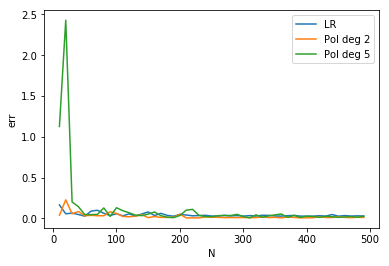

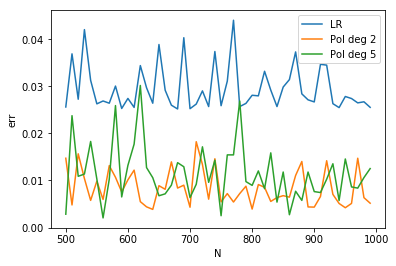

In [59]:
plt.plot(N_grid[:N_grid.size//2], err_1[:N_grid.size//2])
plt.plot(N_grid[:N_grid.size//2], err_2[:N_grid.size//2])
plt.plot(N_grid[:N_grid.size//2], err_3[:N_grid.size//2])
plt.legend(["LR", "Pol deg 2", "Pol deg 5"])
plt.xlabel("N")
plt.ylabel("err")
plt.show()

plt.plot(N_grid[N_grid.size//2:], err_1[N_grid.size//2:])
plt.plot(N_grid[N_grid.size//2:], err_2[N_grid.size//2:])
plt.plot(N_grid[N_grid.size//2:], err_3[N_grid.size//2:])
plt.legend(["LR", "Pol deg 2", "Pol deg 5"])
plt.xlabel("N")
plt.ylabel("err")
plt.show()

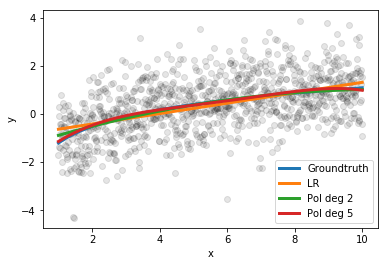

In [60]:
plt.scatter(X, y, c="black", alpha=0.1)
plt.plot(X, y_gt, linewidth=3)
y_pred_1 = LRs_1[np.argmin(err_1)].predict(X)
plt.plot(X, y_pred_1, linewidth=3)
y_pred_2 = LRs_2[np.argmin(err_2)].predict(X_new_2)
plt.plot(X, y_pred_2, linewidth=3)
y_pred_3 = LRs_3[np.argmin(err_3)].predict(X_new_3)
plt.plot(X, y_pred_3, linewidth = 3)
plt.legend(["Groundtruth", "LR", "Pol deg 2", "Pol deg 5"], loc=4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

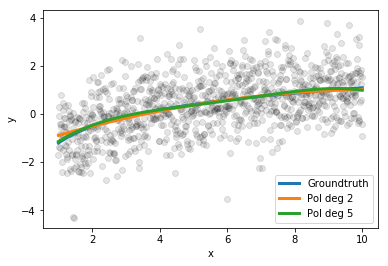

In [61]:
plt.scatter(X, y, c="black", alpha=0.1)
plt.plot(X, y_gt, linewidth=3)
y_pred_2 = LRs_2[np.argmin(err_2)].predict(X_new_2)
plt.plot(X, y_pred_2, linewidth=3)
y_pred_3 = LRs_3[np.argmin(err_3)].predict(X_new_3)
plt.plot(X, y_pred_3, linewidth = 3)
plt.legend(["Groundtruth", "Pol deg 2", "Pol deg 5"], loc=4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Наблюдается эффект, что при использовании полиномиальных признаков среднеквадратичная ошибка уменьшается по сравнению с ошибкой в линейной регрессии (при больших N). Этот эффект связан с тем, что модель становится сложнее с увеличением степени полинома. Возможно, что модель с полиномиальными признаками (особенно с большой степенью) уже начинает запоминать точки вместо предсказания, поэтому в тестовой выборке эта модель покажет результаты хуже.

#### Эксперимент 3

Рассмотрим данные с искусственно внесёнными в них линейными зависимостями. Для наглядности рассмотрим регрессию, которая фактически зависит лишь от одной переменной, но в сгенерированный набор данных внесём ещё несколько признаков, которые будут слабо коррелировать с первым.

Сгенерируем зашумлённую выборку для функции $y = x + \epsilon$, $x$ принимает значения из равномерной сетки на [0, 3], $\epsilon \sim \mathcal{N}(0, 1)$.\
В качестве второго признака добавим $x_2 = 2x + \delta$, где $\delta \sim \mathcal{N}(0, 0.01)$, а в качестве третьего $x_3 = x_1 + x_2 + \nu$, где $\nu \sim \mathcal{N}(0, 0.25)$.\
Построение графиков истинной функции, линейной регрессии и Ridge регрессии, в зависимости от первого столбца данных. Анализ эффектов.

In [85]:
def f_target(X):
    return X

def f_noise(N):
    return np.random.normal(loc=0, scale=1, size=N).reshape((N, 1))

N = 1000
X, y, y_gt = gen_data(N, 1, 0, 3, f_target, f_noise)
delta = np.random.normal(loc=0, scale=0.1, size=N).reshape((N, 1))
nu = np.random.normal(loc=0, scale=0.5, size=N).reshape((N, 1))
x2 = 2*X + delta
x3 = X + x2 + nu
X = np.concatenate([X, x2, x3], axis=1)

In [86]:
from sklearn.linear_model import Ridge
LR = LinearRegression()
Ridge = Ridge()
y_pred_LR = []
y_pred_Ridge = []
LR.fit(X, y)

y_pred_LR = LR.predict(X)
Ridge.fit(X, y)
y_pred_Ridge = Ridge.predict(X)

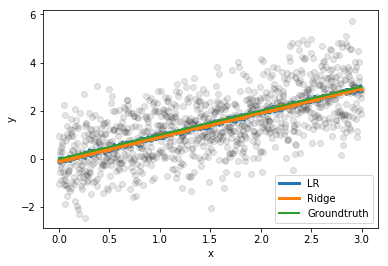

In [87]:
plt.scatter(X[:,0], y, c="black", alpha=0.1)
plt.plot(X[:,0], y_pred_LR, linewidth=3)
plt.plot(X[:,0], y_pred_Ridge, linewidth=3)
plt.plot(X[:,0], y_gt, linewidth=2)
plt.legend(["LR", "Ridge", "Groundtruth"], loc=4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

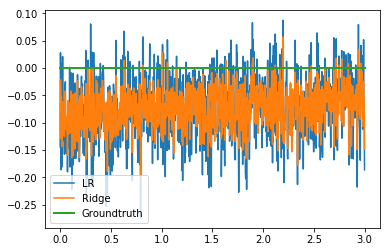

In [88]:
plt.plot(X[:,0], y_pred_LR - y_gt)
plt.plot(X[:,0], y_pred_Ridge - y_gt)
plt.plot(X[:,0], np.zeros(N), linewidth=2)
plt.legend(["LR", "Ridge", "Groundtruth"], loc=3)
plt.show()

In [89]:
print(np.sum((y_pred_LR - y_gt)**2))
print(np.sum((y_pred_Ridge - y_gt)**2))

8.78414750603
6.62826287691


In [90]:
print(LR.coef_)
print(Ridge.coef_)

[[ 2.03986985 -0.40754583 -0.07034698]]
[[ 1.42566582 -0.11165488 -0.06375278]]


Ridge алгоритм работает лучше, так как в нем ошибка намного меньше. Ridge алгоритм уменьшает негативный эффект мультиколлинеарности, который вызывает неустойчивость в оценке параметров. Исходя из коэффициентов видно, что в Ридж регрессии наибольший вес придается первому признаку, а у остальных вес близок к 0. В линейной регрессии у первого и второго признака весомые коэффициенты.

#### Эксперимент 4

Рассмотрим вид регрессии Lasso.\
Генерация двумерной выборки для зашумлённой функции $y = x_1 + x_2 + \epsilon$,\
$x_1$ и $x_2$ образуют равномерную линейную сетку на квадрате [0,1]x[0,1], $\epsilon \sim \mathcal{N}(0, 1)$, добавим в неё два линейно зависимых признака с шумом: 

$$x_3 = 2x_1 + \delta, \quad \delta \sim \mathcal{N}(0, 0.01)$$, 
$$x_4 = 0.5x_1 + x_2 + \nu, \quad \nu \sim \mathcal{N}(0, 0.25)$$ 

Сравнение Ridge и Lasso.

In [38]:
def f_target(X):
    return np.sum(X, axis=1).reshape((X.shape[0], 1))

def f_noise(N):
    return np.random.normal(loc=0, scale=1, size=N).reshape((N, 1))

n = 30
D = 2
N = n**D
X, y, y_gt = gen_data(n, D, 0, 3, f_target, f_noise)
delta = np.random.normal(loc=0, scale=0.1, size=N).reshape((N, 1))
nu = np.random.normal(loc=0, scale=0.5, size=N).reshape((N, 1))
x3 = 2*X[:,0].reshape((N, 1)) + delta
x4 = 0.5*X[:,0].reshape((N, 1)) + X[:,1].reshape((N, 1)) + nu
X = np.concatenate([X, x3, x4], axis=1)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X, y)
Ridge = Ridge()
Ridge.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
print(Lasso.coef_)
print(Ridge.coef_)

[ 0.          0.          0.1836501   0.03487214]
[[ 0.9182243   0.87585949  0.02066833  0.09952911]]


Можно заметить, что в Ридж алгоритме наибольшие веса у первых двух признаков и близкие к 0 веса у остальных признаков, когда в Лассо алгоритме веса у первых двух признаков равны 0. Эффект в том, что в Lasso произошло уменьшение множества активных признаков (часть из них занулилась), в Ridge - нет нулевых, но часть весов близка к 0. Это связано с тем, что в Ридж оценке сферическое ограничение на норму весов, в Lasso такое ограничение, что возникают угловые решения, то есть некоторые веса зануляются. Такие ограничения направлены на борьбу с мультиколлинеарностью.

## Часть 2. Задача с реальными данными

Анализ данных по преступности в разных штатах США. С полным описанием датасета можно ознакомиться здесь: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data",
                   na_values="?", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


Исходя из описания датасета, первые 5 колонок не являются информативными признаками, убираем их.

In [44]:
data = data.iloc[:,5:]
data.head()

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


#### 1.  Попарная корреляция пирсона между всеми признаками

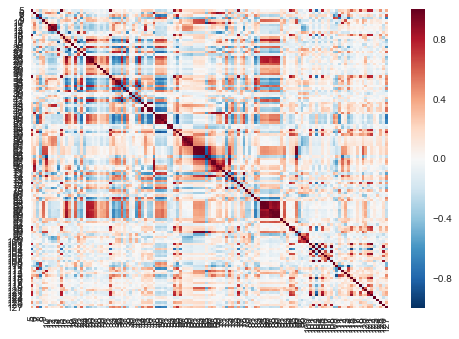

In [45]:
import seaborn as seaborn
data.corr(method='pearson')
seaborn.heatmap(data.corr(method='pearson'))

1. В этом случае мы сталкиваемся с мультиколлинеарностью. Большая по модулю попарная корреляция влияет таким образом, что вызывает неустойчивость в оценке параметров, поскольку увеличивается дисперсия оценок, то есть при разных выборках значения параметров могут сильно различаться.
2. Отметим, что на диагонали находятся корреляции одинаковых признаков, поэтому на диагонали корреляция равна 1. Нужно рассмотреть треугольники или сверху, или снизу от диагонали. Можно заметить, что существуют множество признаков, у которых попарная корреляция по модулю высока (примерно в диапазоне 0.5 - 0.7)

#### 2. Поиск признаков, у которых корреляция с предсказваемым значением максимальна и минимальна

In [46]:
q = data.corr(method='pearson')
max_ind = np.argmax(np.ravel(q.iloc[-1,:-1]))
min_ind = np.argmin(np.ravel(q.iloc[-1,:-1]))
print('max =', np.max(np.ravel(q.iloc[-1,:-1])))
print('min =', np.min(np.ravel(q.iloc[-1,:-1])))
print('index max =', max_ind, '    in data table =', max_ind + 5)
print('index min =', min_ind, '    in data table =', min_ind + 5)

max = 0.737956549859
min = -0.73842380207
index max = 50     in data table = 55
index min = 44     in data table = 49


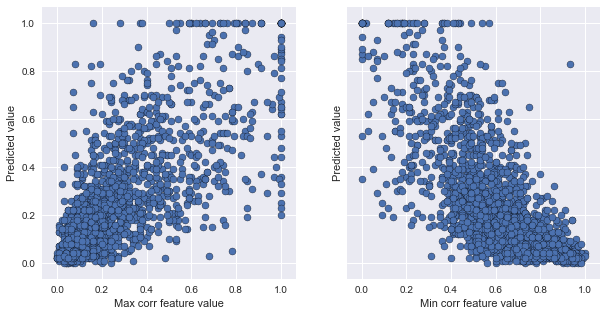

In [47]:
x = data.iloc[:,-1]
a = data[max_ind + 5]
b = data[min_ind + 5]
fig, axis = plt.subplots(1, 2, sharey = True, sharex = True, figsize = (10,5))
axis[0].scatter(a, x, edgecolor = 'black') 
axis[0].set_ylabel('Predicted value')
axis[0].set_xlabel('Max corr feature value') 
axis[1].scatter(b, x, edgecolor = 'black')
axis[1].set_ylabel('Predicted value')
axis[1].set_xlabel('Min corr feature value') 
plt.show()

#### 3.  Гистограмма распределения предсказываемого значения

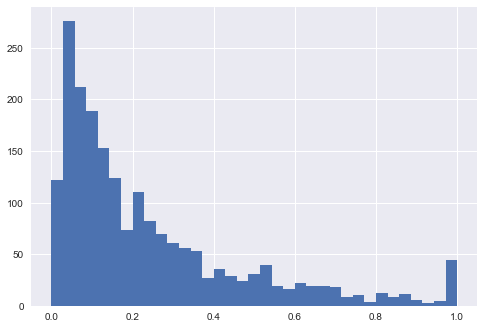

In [48]:
plt.hist(data.iloc[:,-1], bins = 35)
plt.show()

#### 4. Замена всех пропущенных значений на средние по соответствующим признакам

In [49]:
data = data.fillna(data.mean(), inplace=True)

Разделим данные на три выборки: по одной мы будем обучать регрессию, по второй - гиперпараметры, по третьей - тестировать качество:

In [50]:
data = data.reindex(np.random.permutation(data.index))
data_train, data_validate, data_test = np.array_split(data, 3)

In [51]:
X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
X_validate = data_validate.iloc[:,:-1]
y_validate = data_validate.iloc[:,-1]
X_test = data_test.iloc[:,:-1] 
y_test = data_test.iloc[:,-1]

In [52]:
X_train_new = np.concatenate([X_train, X_validate], axis=0)
y_train_new = np.concatenate([y_train, y_validate], axis=0)

#### 5. Обучение линейной регрессии на выборке (X_train_new, y_train_new)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
LR.fit(X_train_new, y_train_new)
y_pred = LR.predict(X_test)
err = mean_squared_error(y_pred, y_test)
print(err)

0.019957903673


#### 6. Подбор оптимальных значений гиперпараметра alpha для регрессий Ridge и Lasso

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
Ridge = Ridge()
Lasso = Lasso()
test_params = {"alpha":[0.0001, 0.0005, 0.001, 0.002, 0.003, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 100]}

grid = GridSearchCV(estimator = Ridge, param_grid = test_params, cv=4)
grid.fit(X_train_new, y_train_new)
opt_alpha_Ridge = grid.best_estimator_.alpha

grid = GridSearchCV(estimator = Lasso, param_grid = test_params, cv=4)
grid.fit(X_train_new, y_train_new)
opt_alpha_Lasso = grid.best_estimator_.alpha

print(opt_alpha_Ridge)
print(opt_alpha_Lasso)

10
0.001


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
Ridge = Ridge(opt_alpha_Ridge)
Lasso = Lasso(opt_alpha_Lasso)
Ridge.fit(X_train_new, y_train_new)
Lasso.fit(X_train_new, y_train_new)
Ridge_coef = Ridge.coef_
Lasso_coef = Lasso.coef_
print(Ridge_coef)
print(Lasso_coef)

[ 0.00660443  0.00557692  0.14442605 -0.07962082 -0.02456666  0.01690905
 -0.00475208 -0.03321962 -0.01498243  0.02498556  0.00236253  0.02751902
  0.01381988 -0.04561894  0.00123992 -0.05375298  0.01553548  0.05336483
 -0.04476723  0.00378909  0.00016317 -0.00436676 -0.02334912 -0.01873341
  0.02001026  0.05087323  0.03577173  0.01016663 -0.03821426 -0.02598744
  0.01973978 -0.00163772 -0.03551319  0.03397292 -0.04413789 -0.01861475
  0.00655796 -0.00900766  0.05513412  0.03034263  0.00195045  0.02120318
  0.01300991 -0.06354255 -0.08652785 -0.05197984 -0.02324818  0.00132187
 -0.03871864  0.01146659  0.11577018 -0.01608852  0.00679588 -0.01097346
 -0.01520777  0.00486155  0.00629515  0.01270003  0.02250651  0.01571381
  0.00122262 -0.01816414  0.00981305  0.00589732  0.02380874 -0.0167492
  0.01898469 -0.02751743  0.05515783  0.02536194 -0.01775019  0.04787305
 -0.05977554 -0.00378523  0.04199114 -0.04169396 -0.01205994  0.03760483
  0.01027473 -0.02608174 -0.00653548  0.00040038 -0.

В Ридж оценке сферическое ограничение на параметры, в свою очередь Лассо приравнивает некоторые веса к 0, чтобы уменьшить эффект мультиколлинеарности. Это наглядно видно на полученных весах: в Лассо оценке абсолютное большинство весов равны 0 в отличие от Ридж оценки. Из этого можно сделать вывод, что большое количество признаков коррелируются.

Отберем наиболее релевантные признаки и обучим две лучшие регрессионные модели только на них

In [65]:
import numpy as np
rel_features = np.nonzero(Lasso_coef)[0]+0
print(rel_features)
X_train_new[:, rel_features]
X_test.iloc[:, rel_features].head()

[  2   3   8  11  13  17  25  26  34  38  44  48  50  59  68  70  71  72
  74  88  90 120]


,7,8,13,16,18,22,30,31,39,43,...,55,64,73,75,76,77,79,93,95,125
1407,0.01,0.93,0.69,0.0,0.65,0.17,0.25,0.26,0.17,0.23,...,0.09,0.01,0.27,0.5,0.01,0.74,0.08,0.32,0.0,0.0
395,0.00,0.97,0.28,0.0,0.46,0.23,0.26,0.29,0.48,0.61,...,0.08,0.03,0.07,0.5,0.03,0.84,0.18,0.21,0.0,0.0
1722,0.02,0.97,0.47,1.0,0.67,0.19,0.33,0.38,0.48,0.43,...,0.21,0.09,0.05,0.0,0.05,0.66,0.06,0.85,0.0,0.0
1517,0.06,0.90,0.31,1.0,0.60,0.16,0.37,0.60,0.03,0.59,...,0.14,0.17,0.12,0.5,0.21,0.00,0.12,0.76,0.0,0.0
317,0.00,0.20,0.39,0.0,0.54,0.90,0.18,0.23,0.41,0.33,...,0.46,0.69,1.00,0.0,0.00,0.96,0.40,0.29,0.0,0.0


In [66]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

Ridge = Ridge(opt_alpha_Ridge)
Lasso = Lasso(opt_alpha_Lasso)
LR = LinearRegression()

Ridge.fit(X_train_new[:,rel_features], y_train_new)
y_pred = Ridge.predict(X_test.iloc[:,rel_features])
err = mean_squared_error(y_pred, y_test)
print("Ridge err relevant features =", err)
Ridge.fit(X_train_new, y_train_new)
y_pred = Ridge.predict(X_test)
err = mean_squared_error(y_pred, y_test)
print("Ridge err all features =",err)

Lasso.fit(X_train_new[:,rel_features], y_train_new)
y_pred = Lasso.predict(X_test.iloc[:,rel_features])
err = mean_squared_error(y_pred, y_test)
print("Lasso err relevant features =", err)
Lasso.fit(X_train_new, y_train_new)
y_pred = Lasso.predict(X_test)
err = mean_squared_error(y_pred, y_test)
print("Lasso err all features =",err)

LR.fit(X_train_new[:,rel_features], y_train_new)
y_pred = LR.predict(X_test.iloc[:,rel_features])
err = mean_squared_error(y_pred, y_test)
print("LR err relevant features =", err)
LR.fit(X_train_new, y_train_new)
y_pred = LR.predict(X_test)
err = mean_squared_error(y_pred, y_test)
print("LR err all features =",err)

Ridge err relevant features = 0.0196636017559
Ridge err all features = 0.0195449092282
Lasso err relevant features = 0.0195874468838
Lasso err all features = 0.0195873607338
LR err relevant features = 0.0196400025521
LR err all features = 0.019957903673


Для Лассо MSE не изменилась, что есть закономерный результат. Если обучить Ридж и линейную регрессию только на релевантных признаках, то MSE так же почти не изменилась (для LR даже улучшилась!). Это говорит о том, что действительно в данных присутствует мультиколлинеарность в большом количестве, и, обучая регрессию, можно не использовать большинство признаков без ощутимой потери в качестве.

#### 7. Обучение KNN на выборке (X_train_new, y_train_new)

In [67]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors = 4, metric='euclidean')
clf.fit(X_train_new, y_train_new)
y_pred = clf.predict(X_test)
err = mean_squared_error(y_test, y_pred)
print(err)

0.023532596009


#### 8. Подбор оптимальных значений параметров n_neighbors и p

In [68]:
clf = KNeighborsRegressor()
test_params = {"n_neighbors":[5, 6, 7, 8, 9, 10, 11, 12], "p": [1, 2, 3]}
grid = GridSearchCV(estimator = clf, param_grid = test_params, cv = 4)
grid.fit(X_train_new, y_train_new)
best_params = grid.best_params_
print(best_params)

{'n_neighbors': 10, 'p': 1}


In [69]:
clf = KNeighborsRegressor(n_neighbors=10, p=1)
clf.fit(X_train_new, y_train_new)
y_pred = grid.predict(X_test)
err = mean_squared_error(y_test, y_pred)
print(err)

0.0223552018072


##### Функция, которая самостоятельно перебирает значения гиперпараметра по линейной сетке 

In [70]:
def optimizer(X_train, y_train, X_validate, y_validate, 
              alpha_min, alpha_max, RegressionClass):
    err = []
    alpha_grid = np.linspace(alpha_min, alpha_max, 100)
    for k in alpha_grid:
        Regression_Class = RegressionClass(alpha = k)
        Regression_Class.fit(X_train, y_train)
        y_pred = Regression_Class.predict(X_validate)
        err.append(np.mean((y_pred - y_validate) ** 2))
    alpha = alpha_grid[np.argmin(err)]
    #alpha_grid - массив перебираемых значений гиперпараметра
    #alpha - найденное оптимальное значение гиперпараметра 
    #err - массив среднеквадратичных отклонений для каждого из alpha_grid
    
    return alpha, err, alpha_grid

In [105]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

alpha_opt, err, alpha_grid = optimizer(X_train, y_train, X_validate, y_validate, alpha_min = 0.1, alpha_max = 50, RegressionClass = Ridge)
Ridge_opt = Ridge(alpha = alpha_opt)
Ridge_opt.fit(X_train, y_train)
y_pred = Ridge_opt.predict(X_test)
print(np.mean((y_pred - y_test)**2))
#print(data.mean()[-1])

0.02001807000007883


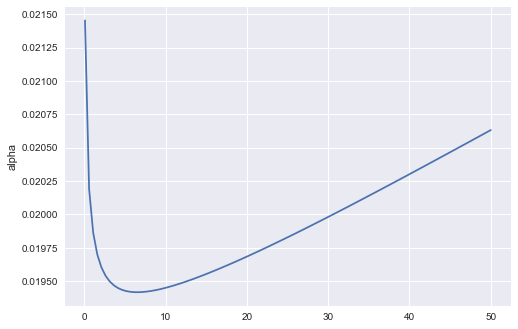

In [106]:
plt.plot(alpha_grid, err)
plt.ylabel('error')
plt.ylabel('alpha')
plt.show()

In [85]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

alpha_opt, err, alpha_grid = optimizer(X_train, y_train, X_validate, y_validate, alpha_min = 0.0001, alpha_max = 0.005, RegressionClass = Lasso)
Lasso_opt = Lasso(alpha = alpha_opt)
Lasso_opt.fit(X_train, y_train)
y_pred = Lasso_opt.predict(X_test)
print(np.mean((y_pred - y_test)**2))
#print(data.mean()[-1])

0.02009442525907687


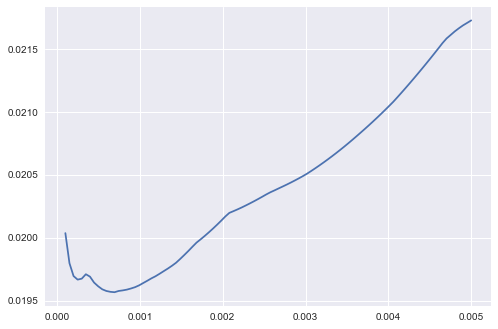

In [86]:
plt.plot(alpha_grid, err)
plt.show()